In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd


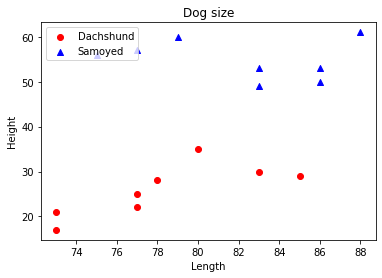

In [12]:
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]  # K-NN알고리즘 -> 다수결 방식으로 데이터의 레이블을 할당하는 분류방식
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]

samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper left')

In [24]:
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]  #닥스훈트 몸길이 몸높이
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]

samo_length = [75, 77, 86, 86, 79, 83, 83, 88]  #사모예드
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트는 0으로 레이블링
s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data))  #사모예드 종은 1

newdata = [[79, 35]]

dogs = np.concatenate((d_data, s_data))
labels = np.concatenate((d_label, s_label))

dog_classes = {0:'Dachshund', 1:'Samoyed'}

k=3   #k값 3으로 설정 후 kNN알고리증(분류기) 생성
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[79, 35]] , 판정 결과: Dachshund


In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:5]

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

def iris_knn(X, y, k):
  X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

k = 3 
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도 : {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도 : 0.956


[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor
n_neighbors가 3일 때 정확도: 0.960




(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f0b14fd0850>)

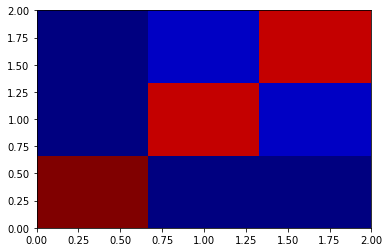

In [42]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(iris.data, iris.target)

classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

X= [[4, 2, 1.3, 0.4],
    [4, 3, 3.2, 2.2]]
y = knn.predict(X)

print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]]))
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일 때 정확도: {1:.3f}\n\n'.format(k, scores))

plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)

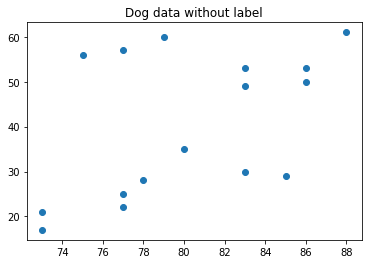

In [43]:
# 군집화 비지도 학습
dog_length = np.array(dach_length + samo_length)
dog_height = np.array(dach_height + samo_height)

dog_data = np.column_stack((dog_length, dog_height))

plt.title("Dog data without label")
plt.scatter(dog_length, dog_height)

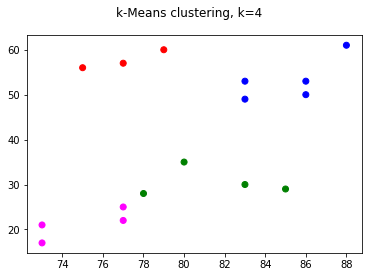

In [51]:
from sklearn import cluster

def kmeans_predict_plot(X, k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(X)
  labels = model.predict(X)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('k-Means clustering, k={}'.format(k))
  plt.scatter(X[:, 0], X[:, 1], color=colors[labels])

kmeans_predict_plot(dog_data, k= 4)